# Analysis of Celtics Shooting Performance

**For this analysis, I used several datasets available on Kaggle. The datasets include Boxscore Totals, Dribbles Shooting, Shot Clock Shooting, and Touch Time Shooting. Each one of them provides unique insights into different aspects of the Celtics’ shooting performance during the 2022-23 regular season.**

In [1]:
library(tidyverse)
library(readr)

# Import datasets
path <- './archive'
boxscore_totals <- read_csv(file.path(path, 'celtics_data - boxscore_totals.csv'))
dribbles_shooting <- read_csv(file.path(path, 'celtics_data - dribbles_shooting.csv'))
shot_clock_shooting <- read_csv(file.path(path, 'celtics_data - shot_clock_shooting.csv'))
touch_time_shooting <- read_csv(file.path(path, 'celtics_data - touch_time_shooting.csv'))

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 82 Columns: 26
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): date, match_up, w_l
dbl (23): min, bos_pts, total_fgm, total_fga, total_fg_per, two_pt_made, two...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 5 Columns: 15
── Column specification ──────────────────────────────────────────────────

In this output, I used the `spec()` function to view the structure of four datasets: `boxscore_totals`, `dribbles_shooting`, `shot_clock_shooting`, and `touch_time_shooting`. This gave me information about the columns and their data types. Then, I used the `summary()` function to get basic statistical summaries for each dataset, such as minimum, maximum, median, and mean values for various columns. This helps me understand the data's overall structure and key metrics at a glance.

In [10]:
# View the structure and summary of each dataset
spec(boxscore_totals)
summary(boxscore_totals)

spec(dribbles_shooting)
summary(dribbles_shooting)

spec(shot_clock_shooting)
summary(shot_clock_shooting)

spec(touch_time_shooting)
summary(touch_time_shooting)

cols(
  date = col_character(),
  match_up = col_character(),
  w_l = col_character(),
  min = col_double(),
  bos_pts = col_double(),
  total_fgm = col_double(),
  total_fga = col_double(),
  total_fg_per = col_double(),
  two_pt_made = col_double(),
  two_pt_att = col_double(),
  two_pt_per = col_double(),
  three_pt_made = col_double(),
  three_pt_att = col_double(),
  three_pt_per = col_double(),
  ftm = col_double(),
  fta = col_double(),
  ft_per = col_double(),
  oreb = col_double(),
  dreb = col_double(),
  total_reb = col_double(),
  ast = col_double(),
  per_fg_ast = col_double(),
  tov = col_double(),
  stl = col_double(),
  blk = col_double(),
  pf = col_double()
)

     date             match_up             w_l                 min       
 Length:82          Length:82          Length:82          Min.   :48.00  
 Class :character   Class :character   Class :character   1st Qu.:48.00  
 Mode  :character   Mode  :character   Mode  :character   Median :48.00  
                                                          Mean   :48.73  
                                                          3rd Qu.:48.00  
                                                          Max.   :58.00  
    bos_pts        total_fgm       total_fga       total_fg_per  
 Min.   : 92.0   Min.   :29.00   Min.   : 74.00   Min.   :34.80  
 1st Qu.:109.2   1st Qu.:39.00   1st Qu.: 84.00   1st Qu.:43.73  
 Median :119.5   Median :42.00   Median : 88.00   Median :47.60  
 Mean   :117.9   Mean   :42.20   Mean   : 88.76   Mean   :47.63  
 3rd Qu.:126.0   3rd Qu.:45.75   3rd Qu.: 92.00   3rd Qu.:50.90  
 Max.   :142.0   Max.   :55.00   Max.   :109.00   Max.   :59.10  
  two_pt_made      t

cols(
  dribbles = col_character(),
  gp = col_double(),
  total_freq_per = col_double(),
  total_fg_made = col_double(),
  total_fg_att = col_double(),
  total_fg_per = col_double(),
  effective_fg_per = col_double(),
  two_pt_freq_per = col_double(),
  two_pt_fg_made = col_double(),
  two_pt_fg_att = col_double(),
  two_pt_fg_per = col_double(),
  three_pt_freq_per = col_double(),
  three_pt_fg_made = col_double(),
  three_pt_fg_att = col_double(),
  three_pt_fg_per = col_double()
)

   dribbles               gp     total_freq_per total_fg_made   total_fg_att 
 Length:5           Min.   :82   Min.   : 9.5   Min.   : 355   Min.   : 693  
 Class :character   1st Qu.:82   1st Qu.:11.1   1st Qu.: 395   1st Qu.: 805  
 Mode  :character   Median :82   Median :12.9   Median : 414   Median : 942  
                    Mean   :82   Mean   :20.0   Mean   : 692   Mean   :1456  
                    3rd Qu.:82   3rd Qu.:18.1   3rd Qu.: 640   3rd Qu.:1314  
                    Max.   :82   Max.   :48.4   Max.   :1656   Max.   :3524  
  total_fg_per   effective_fg_per two_pt_freq_per two_pt_fg_made
 Min.   :43.90   Min.   :49.20    Min.   : 7.0    Min.   :290   
 1st Qu.:47.00   1st Qu.:52.10    1st Qu.: 7.9    1st Qu.:316   
 Median :48.70   Median :53.70    Median : 9.1    Median :321   
 Mean   :47.98   Mean   :54.32    Mean   :10.4    Mean   :429   
 3rd Qu.:49.10   3rd Qu.:55.60    3rd Qu.:13.8    3rd Qu.:550   
 Max.   :51.20   Max.   :61.00    Max.   :14.2    Max.   :668   

cols(
  `shot_clock_range(sec)` = col_character(),
  gp = col_double(),
  total_freq_per = col_double(),
  total_fg_made = col_double(),
  total_fg_att = col_double(),
  total_fg_per = col_double(),
  effective_fg_per = col_double(),
  two_pt_freq_per = col_double(),
  two_pt_fg_made = col_double(),
  two_pt_fg_att = col_double(),
  two_pt_fg_per = col_double(),
  three_pt_freq_per = col_double(),
  three_pt_fg_made = col_double(),
  three_pt_fg_att = col_double(),
  three_pt_fg_per = col_double()
)

 shot_clock_range(sec)       gp     total_freq_per   total_fg_made   
 Length:6              Min.   :82   Min.   : 2.600   Min.   : 107.0  
 Class :character      1st Qu.:82   1st Qu.: 8.375   1st Qu.: 243.8  
 Mode  :character      Median :82   Median :11.500   Median : 425.0  
                       Mean   :82   Mean   :16.667   Mean   : 576.7  
                       3rd Qu.:82   3rd Qu.:16.125   3rd Qu.: 584.5  
                       Max.   :82   Max.   :49.400   Max.   :1682.0  
  total_fg_att     total_fg_per   effective_fg_per two_pt_freq_per 
 Min.   : 188.0   Min.   :37.80   Min.   :43.90    Min.   : 2.400  
 1st Qu.: 611.5   1st Qu.:45.73   1st Qu.:54.90    1st Qu.: 4.450  
 Median : 835.0   Median :47.65   Median :57.05    Median : 6.350  
 Mean   :1213.0   Mean   :48.32   Mean   :55.53    Mean   : 8.650  
 3rd Qu.:1172.5   3rd Qu.:53.02   3rd Qu.:58.67    3rd Qu.: 8.325  
 Max.   :3598.0   Max.   :56.90   Max.   :61.80    Max.   :24.000  
 two_pt_fg_made  two_pt_fg_att    

cols(
  `touch_time_range(sec)` = col_character(),
  gp = col_double(),
  total_freq_per = col_double(),
  total_fg_made = col_double(),
  total_fg_att = col_double(),
  total_fg_per = col_double(),
  effective_fg_per = col_double(),
  two_pt_freq_per = col_double(),
  two_pt_fg_made = col_double(),
  two_pt_fg_att = col_double(),
  two_pt_fg_per = col_double(),
  three_pt_freq_per = col_double(),
  three_pt_fg_made = col_double(),
  three_pt_fg_att = col_double(),
  three_pt_fg_per = col_double()
)

 touch_time_range(sec)       gp     total_freq_per total_fg_made   
 Length:3              Min.   :82   Min.   :15.9   Min.   : 501.0  
 Class :character      1st Qu.:82   1st Qu.:23.3   1st Qu.: 804.5  
 Mode  :character      Median :82   Median :30.7   Median :1108.0  
                       Mean   :82   Mean   :33.3   Mean   :1153.3  
                       3rd Qu.:82   3rd Qu.:42.0   3rd Qu.:1479.5  
                       Max.   :82   Max.   :53.3   Max.   :1851.0  
  total_fg_att   total_fg_per   effective_fg_per two_pt_freq_per
 Min.   :1159   Min.   :43.20   Min.   :48.60    Min.   :10.90  
 1st Qu.:1698   1st Qu.:45.45   1st Qu.:51.05    1st Qu.:14.35  
 Median :2237   Median :47.70   Median :53.50    Median :17.80  
 Mean   :2426   Mean   :46.80   Mean   :54.27    Mean   :17.33  
 3rd Qu.:3060   3rd Qu.:48.60   3rd Qu.:57.10    3rd Qu.:20.55  
 Max.   :3882   Max.   :49.50   Max.   :60.70    Max.   :23.30  
 two_pt_fg_made  two_pt_fg_att  two_pt_fg_per   three_pt_freq_per
 Mi

In the following section, I checked for missing values in the four datasets: `boxscore_totals`, `dribbles_shooting`, `shot_clock_shooting`, and `touch_time_shooting`. The console output confirmed that there were no missing values in any of the datasets. However, I wrote a function, `replace_na_values()`, to clean the data by replacing any potential missing values with the mean for numeric columns or "Unknown" for character columns. This function ensures data consistency and readiness for analysis, even though no missing values were found.

In [3]:
# Check for missing values and clean datasets
missing_values <- sum(is.na(boxscore_totals))
cat("Number of missing values:", missing_values, "\n")
missing_values <- sum(is.na(dribbles_shooting))
cat("Number of missing values:", missing_values, "\n")
missing_values <- sum(is.na(shot_clock_shooting))
cat("Number of missing values:", missing_values, "\n")
missing_values <- sum(is.na(touch_time_shooting))
cat("Number of missing values:", missing_values, "\n")


# Function to replace N/A values in a data frame
replace_na_values <- function(df) {
  df %>% mutate(across(where(is.numeric), ~ replace_na(., mean(., na.rm = TRUE)))) %>%
    mutate(across(where(is.character), ~ replace_na(., "Unknown")))
}

# Replace N/A values in each dataset
boxscore_totals_clean <- replace_na_values(boxscore_totals)
dribbles_shooting_clean <- replace_na_values(dribbles_shooting)
shot_clock_shooting_clean <- replace_na_values(shot_clock_shooting)
touch_time_shooting_clean <- replace_na_values(touch_time_shooting)

Number of missing values: 0 
Number of missing values: 0 
Number of missing values: 0 
Number of missing values: 0 


Here, the project guidelines required me to provide both a summary statistic and a plot for a numerical variable, as well as to perform similar analysis for a categorical variable.

For the numerical variable, I focused on the points scored by the Celtics (bos_pts) in the boxscore_totals dataset. The summary statistics provided insights into the minimum, maximum, median, mean, and quartile values. I also created a histogram to visualize the distribution of the points scored.

For the categorical variable analysis, I could use a variable like w_l (win/loss) to show the number of games won versus lost, providing a frequency count and a bar plot to illustrate the team’s performance in terms of game outcomes. This dual analysis helps in understanding both the scoring patterns and the overall game outcomes for the season.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   92.0   109.2   119.5   117.9   126.0   142.0 

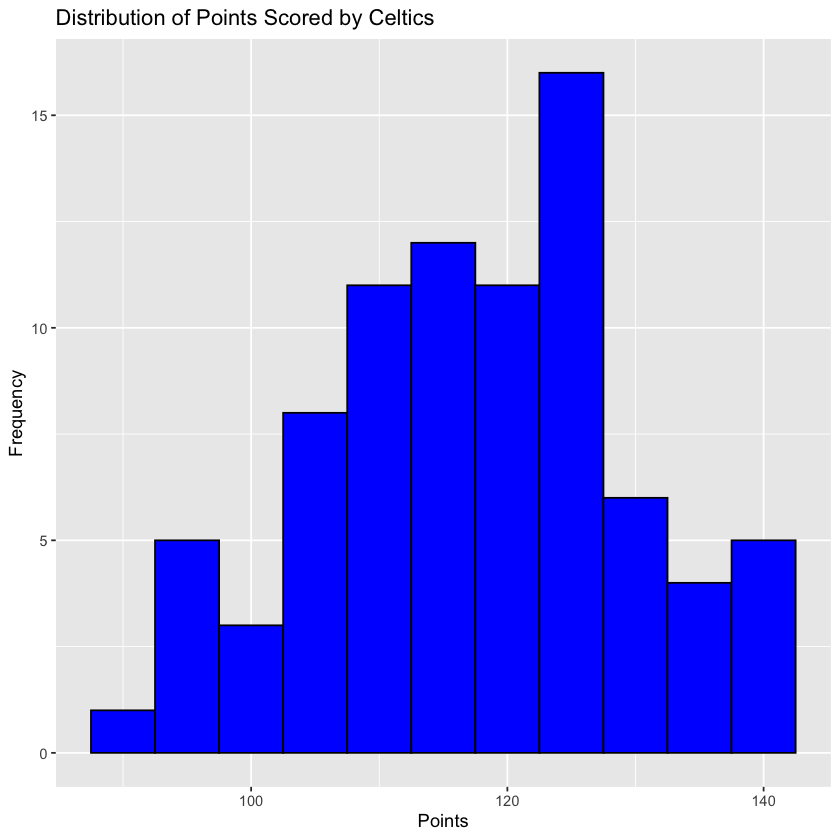

In [11]:
# Summary statistics for points scored by Celtics in boxscore_totals
summary(boxscore_totals_clean$bos_pts)

# Plot distribution of points scored
ggplot(boxscore_totals_clean, aes(x = bos_pts)) +
  geom_histogram(binwidth = 5, fill = "blue", color = "black") +
  labs(title = "Distribution of Points Scored by Celtics",
       x = "Points", y = "Frequency")


 L  W 
25 57 

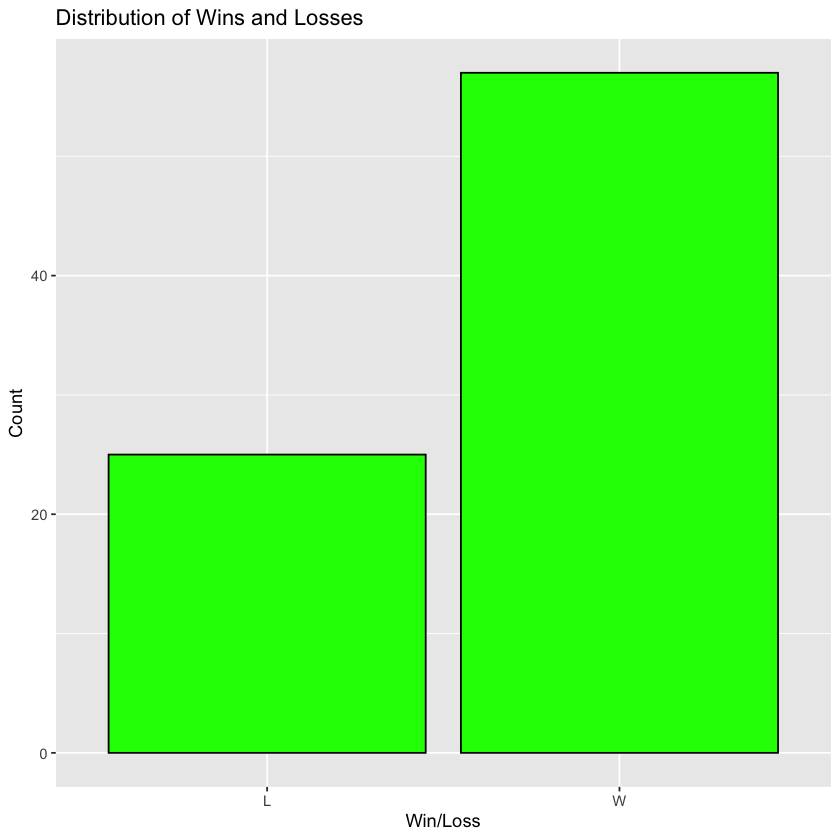

In [12]:
# Plot the distribution of win/loss
ggplot(boxscore_totals_clean, aes(x = w_l)) +
  geom_bar(fill = "green", color = "black") +
  labs(title = "Distribution of Wins and Losses",
       x = "Win/Loss", y = "Count")

# Frequency table for a categorical variable: win/loss in boxscore_totals
table(boxscore_totals_clean$w_l)

I analyzed the relationship between the points scored by the Celtics (bos_pts) and the number of free throws made (ftm). The scatter plot displays individual games, with the x-axis representing the free throws made and the y-axis representing the points scored. The purple points illustrate the distribution of these values across games.

A red linear regression line is included to indicate the overall trend. Although the positive slope of the line suggests a slight positive correlation, the dispersion of points around the regression line is quite wide, showing no clear pattern of clustering along the line. This means that there is no close relationship between the number of free throws taken and the total number of points scored. Thus, free throws do not significantly help to predict points scored in games played by the Celtics.

`geom_smooth()` using formula = 'y ~ x'


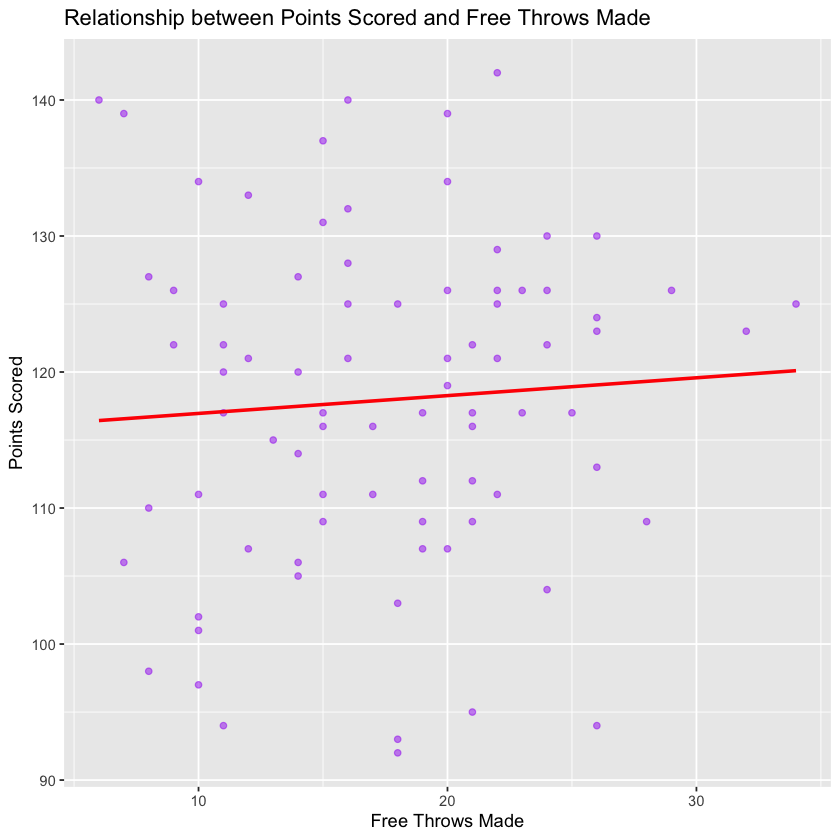

In [14]:
# Analysis of a set of two or more variables
# Plot the relationship between 'bos_pts' and 'ftm'
ggplot(boxscore_totals_clean, aes(x = ftm, y = bos_pts)) +
  geom_point(color = "purple", alpha = 0.5) +
  geom_smooth(method = "lm", se = FALSE, color = "red") +
  labs(title = "Relationship between Points Scored and Free Throws Made",
       x = "Free Throws Made", y = "Points Scored")

In this step, I was asked to demonstrate the Central Limit Theorem (CLT). It is a fundamental statistical principle that states that the distribution of sample means will approximate a normal distribution, regardless of the population’s original distribution, provided the sample size is sufficiently large. This property allows for making inferences about population parameters using sample data, especially when the sample size is 30 or more.

To illustrate this, I drew random samples from the boxscore_totals_clean dataset, focusing on the points scored by the Celtics (bos_pts). I used sample sizes of 30, 50, and 100, generating 1,000 random samples for each size and calculating the means of these samples. The resulting histograms show that as the sample size increases, the distribution of the sample means becomes more concentrated around the true population mean and forms a more normal shape.

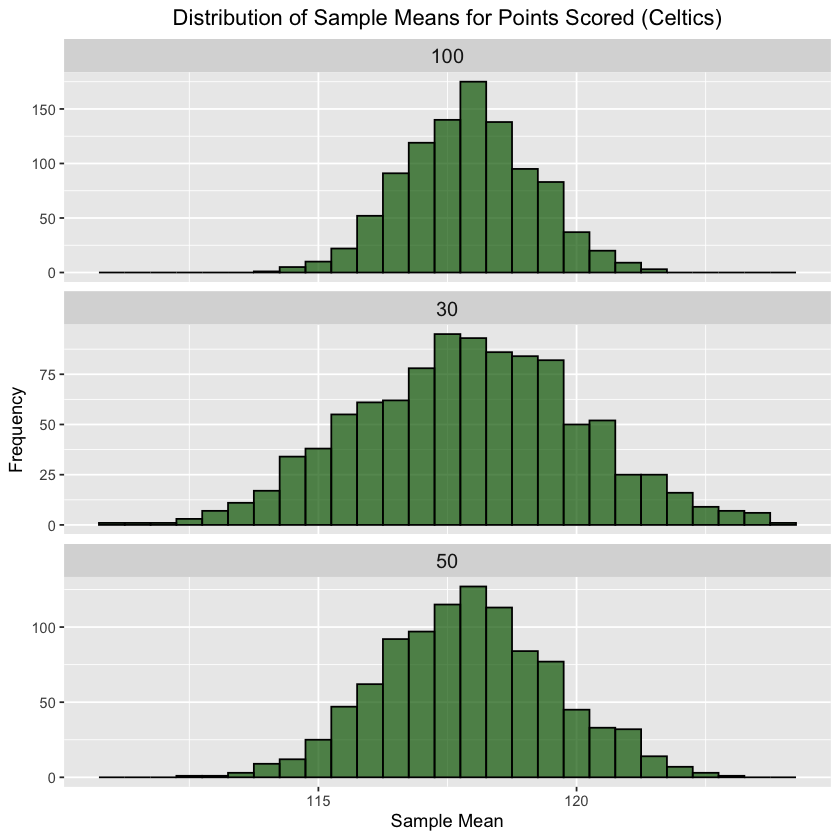

In [15]:
# Central Limit Theorem with random sampling
# Function to draw random samples and plot their means
plot_sample_means <- function(data, variable, sample_sizes, num_samples = 1000) {
  sample_means <- list()
  
  for (size in sample_sizes) {
    means <- replicate(num_samples, mean(sample(data[[variable]], size, replace = TRUE)))
    sample_means[[as.character(size)]] <- data.frame(Mean = means)
  }
  
  sample_means_df <- bind_rows(sample_means, .id = "Sample_Size")
  
  ggplot(sample_means_df, aes(x = Mean)) +
    geom_histogram(binwidth = 0.5, alpha = 0.7, fill = "darkgreen", color = "black") +
    facet_wrap(~ Sample_Size, scales = "free_y", ncol = 1) +
    labs(title = "Distribution of Sample Means for Points Scored (Celtics)",
         x = "Sample Mean", y = "Frequency") +
    theme(legend.position = "none", 
          strip.text = element_text(size = 12),
          plot.title = element_text(hjust = 0.5))
}


sample_sizes <- c(30, 50, 100)
plot_sample_means(boxscore_totals_clean, "bos_pts", sample_sizes)

Next, I applied three different sampling methods to the `boxscore_totals_clean` dataset to analyze how different sampling techniques can impact the estimated mean points scored by the Celtics. The methods used were Simple Random Sampling, Stratified Sampling and Systematic Sampling.

In [8]:
# Sampling methods
# Simple Random Sampling
set.seed(123)
simple_random_sample <- boxscore_totals_clean %>% sample_n(82)

# Stratified Sampling by 'w_l'
set.seed(123)
stratified_sample <- boxscore_totals_clean %>% 
  group_by(w_l) %>% 
  sample_frac(0.1)

# Systematic Sampling
set.seed(123)
systematic_sample <- boxscore_totals_clean %>% 
  slice(seq(1, n(), by = 10))

population_mean <- mean(boxscore_totals_clean$bos_pts)
cat("Population mean:", population_mean, "\n")

simple_random_mean <- mean(simple_random_sample$bos_pts)
cat("Simple random sample mean:", simple_random_mean, "\n")

stratified_mean <- mean(stratified_sample$bos_pts)
cat("Stratified sample mean:", stratified_mean, "\n")

systematic_mean <- mean(systematic_sample$bos_pts)
cat("Systematic sample mean:", systematic_mean, "\n")

Population mean: 117.939 
Simple random sample mean: 117.939 
Stratified sample mean: 114.5 
Systematic sample mean: 120.3333 


1. **Simple Random Sampling**: This method involved selecting 82 games randomly from the dataset. The mean points scored from this sample matched the population mean exactly, at 117.939.

2. **Stratified Sampling**: Here, I stratified the data by the 'w_l' (win/loss) category and sampled 10% from each stratum. The mean from this sample was slightly lower, at 114.5, suggesting that the proportion of wins and losses could influence the average points scored.

3. **Systematic Sampling**: This method selected every 10th game from the dataset, resulting in a sample mean of 120.3333, which is slightly higher than the population mean.

These different sampling methods demonstrate that the estimated mean can vary depending on the sampling technique used. Simple Random Sampling, which equally represents all data, closely matched the population mean. In contrast, Stratified Sampling provided insight into variations within specific subgroups, while Systematic Sampling, although easy to apply, can introduce bias if there are periodic patterns in the data. Therefore, the choice of sampling method can significantly impact the conclusions drawn from the data and should be carefully considered depending on the analysis objective.

As an additional feature in my analysis, I examined the point difference between the Celtics and their opponents. I calculated the point difference (`PTS_diff`) by subtracting the average points scored by the Celtics (`bos_pts`) from the points scored in each game. This provided a metric to assess the margin by which the Celtics either won or lost games.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-25.939  -8.689   1.561   0.000   8.061  24.061 

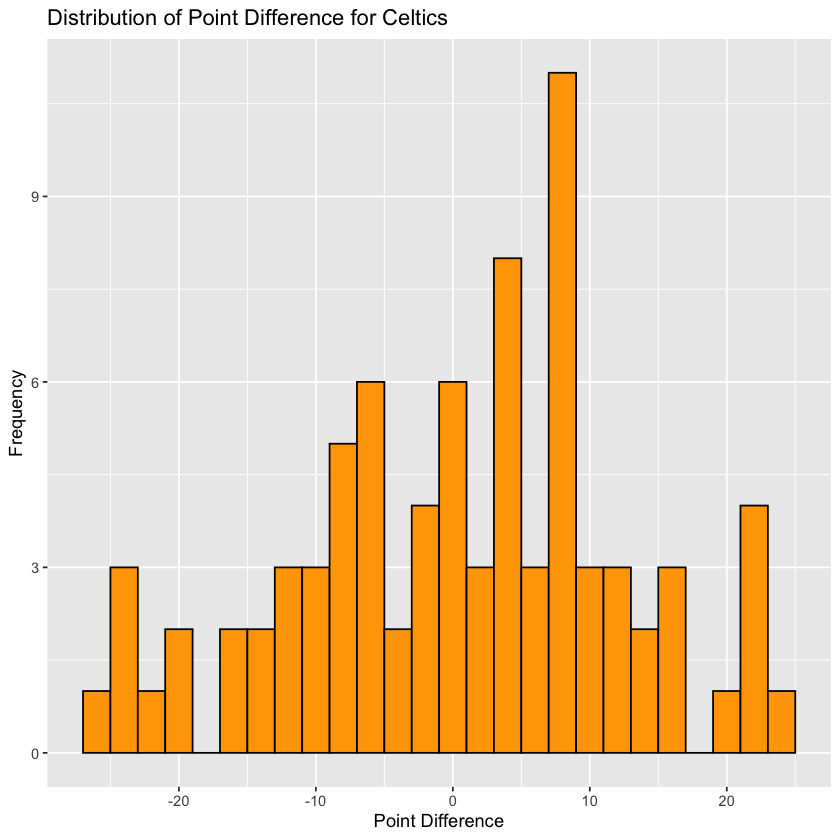

In [9]:
# Additional feature: point difference between Celtics and opponents
boxscore_totals_clean <- boxscore_totals_clean %>%
  mutate(PTS_diff = bos_pts - mean(bos_pts, na.rm = TRUE))

# Summary and plot
summary(boxscore_totals_clean$PTS_diff)

ggplot(boxscore_totals_clean, aes(x = PTS_diff)) +
  geom_histogram(binwidth = 2, fill = "orange", color = "black") +
  labs(title = "Distribution of Point Difference for Celtics",
       x = "Point Difference", y = "Frequency")

The summary statistics showed a range of point differences, from a minimum of -25.939 to a maximum of 24.061, with a median point difference of 1.561. The mean point difference was zero, indicating a balanced distribution around the mean score. 

I visualized this data using a histogram, which displayed the frequency distribution of these point differences. The plot revealed that the point differences were relatively symmetric around zero, with a noticeable concentration around the 0 to 10 range. This suggests that while the Celtics often won games, many victories were by a relatively narrow margin. This analysis helps in understanding the team's performance in terms of both offensive and defensive capabilities, providing insights into how closely contested their games were.

# Conclusions from the analysis

The analysis provides several key insights:

- **Performance Assessment**: The high win percentage and consistent scoring demonstrate strong overall performance, indicating that the Celtics are a competitive team with a robust ability to outscore their opponents. Recognizing these trends can help reinforce successful strategies, ensuring that the team continues to leverage its strengths effectively.

- **Game Strategy**: Analyzing scoring patterns and point differences can assist in developing more effective game strategies, tailored to enhance both offensive and defensive plays.

- **Player Development**: The insights into scoring dynamics offer valuable guidance for player training and development, highlighting areas where players can improve to enhance team performance.

- **Data-Driven Decisions**: The analysis emphasizes the critical role of data in making informed strategic decisions, allowing the team to optimize its approach based on detailed performance metrics.